# import Python library

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import csv. format data

In [66]:
data = pd.read_csv("c:\\MSC 641\\Lectures\\Week2\\Social_Network_Ads.csv")
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# Split the data into a training set and a test set 

In [93]:
from sklearn.model_selection import train_test_split
x = data.iloc[:, [2,3]].values
y = data.iloc[:, 4].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

# Convert data into a standard scale

In [94]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Train the model using KNN and make prediction

In [90]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=20)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# Performance evaluation

In [80]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

0.875
[[40  8]
 [ 2 30]]


# Impact for the value of K

In [95]:
error = []
for i in range(1, 50):
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(x_train, y_train)
    pred_i = classifier.predict(x_test)
    error.append(metrics.accuracy_score(y_test, pred_i))
print(error)

[0.8, 0.825, 0.8625, 0.8625, 0.8625, 0.8625, 0.8875, 0.9, 0.9, 0.8875, 0.9, 0.9, 0.9, 0.9, 0.925, 0.9125, 0.9, 0.9125, 0.925, 0.925, 0.925, 0.925, 0.9125, 0.925, 0.925, 0.925, 0.9375, 0.9125, 0.9125, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9125, 0.8875, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9125, 0.9, 0.8875, 0.9, 0.8875, 0.8875, 0.8875]


Text(0, 0.5, 'Prediction accuracy')

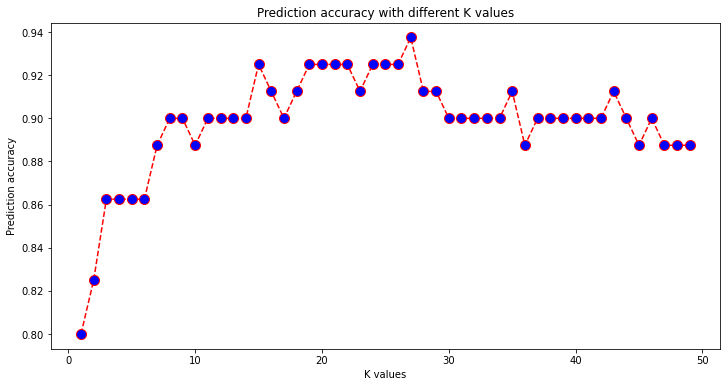

In [97]:
plt.figure(figsize=(12,6))
plt.plot(range(1,50),error, color='red', linestyle='dashed', marker = 'o', markerfacecolor='blue', markersize=10)
plt.title('Prediction accuracy with different K values')
plt.xlabel('K values')
plt.ylabel('Prediction accuracy')

# Cross validation

In [83]:
from sklearn.model_selection import cross_val_score
cv_score = []
for i in range(1,50):
    classifier = KNeighborsClassifier(n_neighbors=i)
    cv = cross_val_score(classifier, x_train, y_train, cv=5)
    cv_score.append(np.mean(cv))
print(cv_score)

[0.871875, 0.859375, 0.8875, 0.896875, 0.9, 0.9, 0.9125, 0.903125, 0.9125, 0.909375, 0.909375, 0.903125, 0.909375, 0.909375, 0.909375, 0.9125, 0.9125, 0.903125, 0.90625]


Text(0, 0.5, 'cv score')

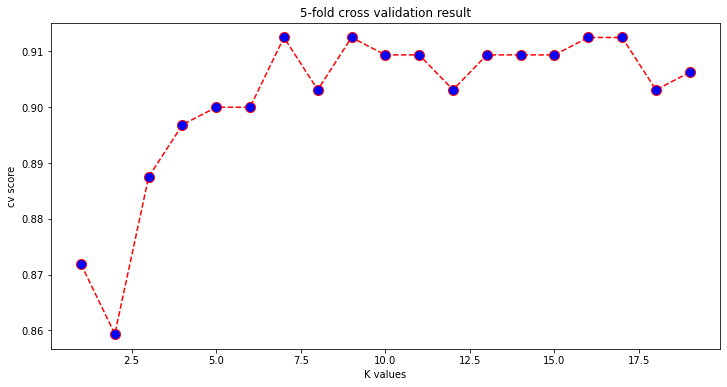

In [84]:
plt.figure(figsize=(12,6))
plt.plot(range(1,50),cv_score, color='red', linestyle='dashed', marker = 'o', markerfacecolor='blue', markersize=10)
plt.title('5-fold cross validation result')
plt.xlabel('K values')
plt.ylabel('cv score')